In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from scipy.stats import linregress

# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [110]:
coffee_production_df = pd.read_csv('../Data/Cleaned/coffee_production_df.csv')
coffee_prices_df = pd.read_csv('../Data/Cleaned/coffee_prices.csv')
elnino_lanina_df = pd.read_csv('../Data/Cleaned/elnino_lanina.csv')

# first merge
first_merge = pd.merge(coffee_production_df, coffee_prices_df, on='Years')

# Delete extra index column
del first_merge['Unnamed: 0']

# Second merge
coffee_data_df = pd.merge(first_merge, elnino_lanina_df, on='Years')

# Display df
coffee_data_df.head()

,Country,City,Latitude,Longitude,Coffee type,Years,Total Production,Global Price of Arabica Coffee (US cents per a lb),Global Price of Robusta Coffee (US cents per a lb),Oceanic Index,El Nino or La Nina Year,Magnitude
0,Angola,Bailundo,-12.1650,15.3694,Robusta/Arabica,1990,3.000000e+06,89.15,54.99,0.375,El Nino,Neutral
1,Bolivia,Coroico,-16.1889,-67.7273,Arabica,1990,7.380000e+06,89.15,54.99,0.375,El Nino,Neutral
2,Brazil,Poços de Caldas,-21.7800,-46.5692,Arabica/Robusta,1990,1.637160e+09,89.15,54.99,0.375,El Nino,Neutral
3,Burundi,Bukeye,-3.0830,29.3670,Arabica/Robusta,1990,2.922000e+07,89.15,54.99,0.375,El Nino,Neutral
4,Ecuador,Zamora,-4.0692,-78.9567,Arabica/Robusta,1990,9.024000e+07,89.15,54.99,0.375,El Nino,Neutral


## Questions

How has El Nino/La Nina patterns impacted coffee prices?


In [111]:
# Function to create Linear Regression plots
def regression_analysis(df,x_col,y_col):
    x = df[x_col].values
    y = df[y_col].values
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq, (35, 0.5), fontsize=15, color="red")
    
    print(f"The r-value is : {rvalue**2}")


## Robusta Coffee Price vs. Oceanic Index

The r-value is : 0.04325818306508165


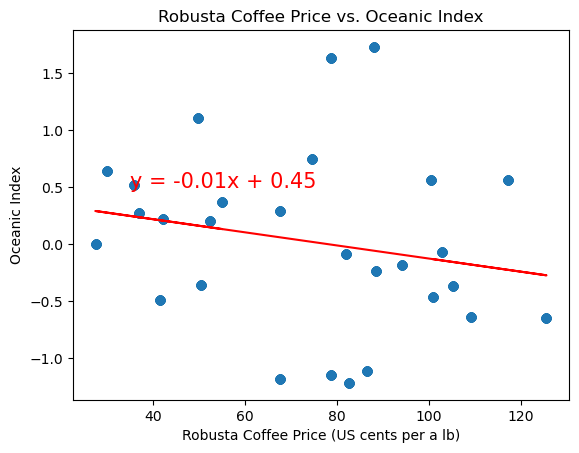

In [112]:
regression_analysis(coffee_data_df,'Global Price of Robusta Coffee (US cents per a lb)','Oceanic Index')

# Config regression
plt.xlabel('Robusta Coffee Price (US cents per a lb)')
plt.ylabel('Oceanic Index')
plt.title('Robusta Coffee Price vs. Oceanic Index')

# Save figure
plt.savefig('../Visuals/regression_analysis/robusta_oceanic.png')

plt.show()

## Arabica Coffee Price vs. Oceanic Index

The r-value is : 0.01362321844955141


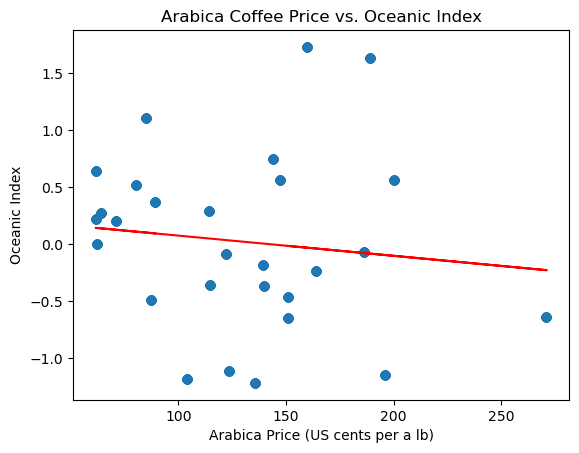

In [113]:
regression_analysis(coffee_data_df,'Global Price of Arabica Coffee (US cents per a lb)','Oceanic Index')

# Config regression
plt.xlabel('Arabica Price (US cents per a lb)')
plt.ylabel('Oceanic Index')
plt.title('Arabica Coffee Price vs. Oceanic Index')

# Save figure
plt.savefig('../Visuals/regression_analysis/arabica_oceanic.png')

plt.show()

## Total Coffee Production vs. Oceanic Index

The r-value is : 3.762126883609284e-05


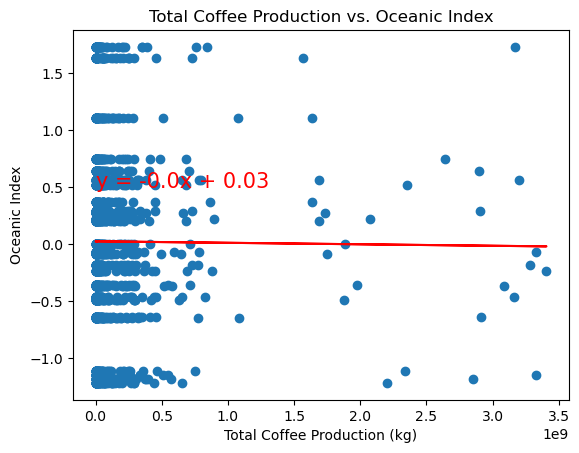

In [114]:
regression_analysis(coffee_data_df,'Total Production','Oceanic Index')

# Config regression
plt.xlabel('Total Coffee Production (kg)')
plt.ylabel('Oceanic Index')
plt.title('Total Coffee Production vs. Oceanic Index')

# Save figure
plt.savefig('../Visuals/regression_analysis/total_production_oceanic.png')

plt.show()

## Robusta Coffee Price vs Total Production

The r-value is : 0.0008209418261079604


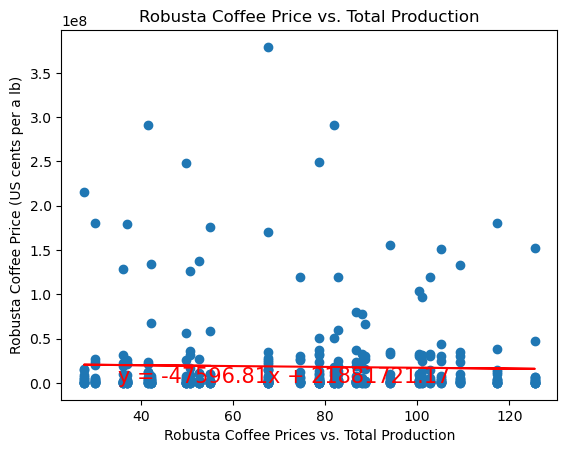

In [115]:
# Filter to just robusta in the df
robusta = coffee_data_df.loc[coffee_data_df['Coffee type'] == 'Robusta']
regression_analysis(robusta,'Global Price of Robusta Coffee (US cents per a lb)','Total Production')

# Config regression
plt.xlabel('Robusta Coffee Prices vs. Total Production')
plt.ylabel('Robusta Coffee Price (US cents per a lb)')
plt.title('Robusta Coffee Price vs. Total Production')

# Save figure
plt.savefig('../Visuals/regression_analysis/robusta_total_production.png')

plt.show()

## Arabica Coffee Price vs Total Production

The r-value is : 0.0003086627549043604


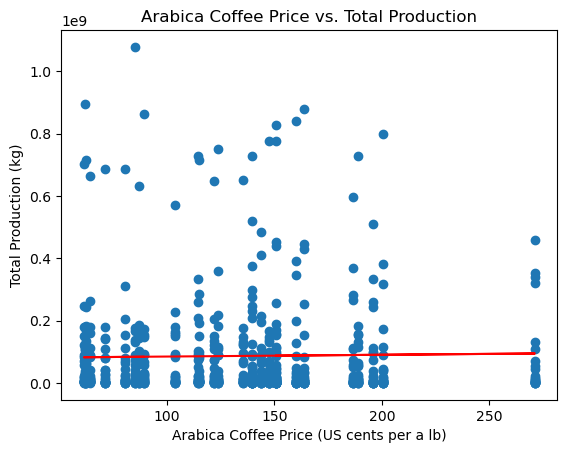

In [116]:
# Filter to just arabica in the df
arabica = coffee_data_df.loc[coffee_data_df['Coffee type'] == 'Arabica']
regression_analysis(arabica,'Global Price of Arabica Coffee (US cents per a lb)','Total Production')

# Config regression
plt.xlabel('Arabica Coffee Price (US cents per a lb)')
plt.ylabel('Total Production (kg)')
plt.title('Arabica Coffee Price vs. Total Production')

# Save figure
plt.savefig('../Visuals/regression_analysis/arabica_total_production.png')

plt.show()

In [117]:
# Save .csv to 'Cleaned' folder
coffee_data_df.to_csv('../Data/Cleaned/coffee_data_df.csv', index=False)
